In [256]:
#Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go


In [257]:
df = pd.read_csv("C:/Users/Winquistt/DSC630/Final/ai4i2020.csv")

In [258]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [259]:
#df.describe # look at the data to view the attributes 

In [260]:
df.shape # how many rows and columns are there in the data set

(10000, 14)

In [261]:
df.isnull().sum() # are there any null values 

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [262]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UDI,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
Product ID,10000,10000,M14860,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10000,3,L,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],10000.0,NaN,NaN,NaN,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,NaN,NaN,NaN,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,NaN,NaN,NaN,1538.7761,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,NaN,NaN,NaN,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,NaN,NaN,NaN,107.951,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,NaN,NaN,NaN,0.0339,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,NaN,NaN,NaN,0.0046,0.067671,0.0,0.0,0.0,0.0,1.0


In [263]:
df.dtypes # find the data types. The objects will need to conert do do a correlation 

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

To sum up the data¶
There is no missing Data
There are no duplicate data values 
Six columns are numerical features, including UDI
three are categorical features including Product ID 

There are strongly correlated features namely process and air temperature. Torque and rotational speed are also strongly correlated. We can drop one of the temperatures, but the torque to rotational speed difference might be a indication of a failure, so we'll keep both.

The following pie chart shows the percentages of machines by Type:

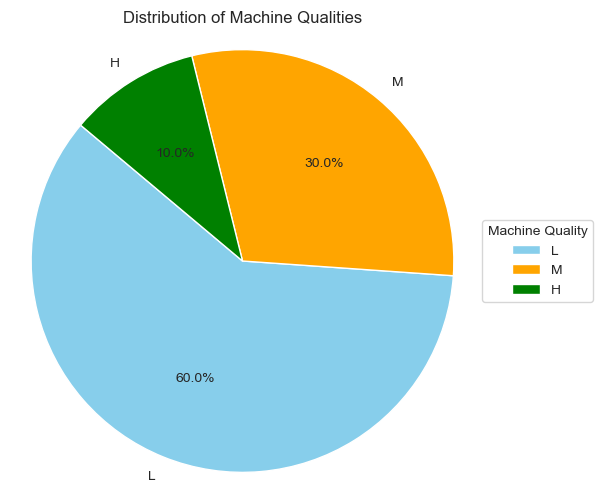

In [264]:
# Extracting the unique machine qualities and their counts
machine_qualities = df['Type'].value_counts()
labels = machine_qualities.index
counts = machine_qualities.values

# Setting up the color palette for better visual distinction
colors = ['skyblue', 'orange', 'green']

# Creating the pie chart with more descriptive labels and a legend
plt.figure(figsize=(6, 6))  # Adjusting figure size for better readability
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Machine Qualities')
plt.legend(labels, title="Machine Quality", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Failure analysis by machine quality The following pie chart provides insight into the distribution of failures across different qualities of machines. This analysis is crucial to understand if certain machine qualities are more prone to failures, which can be instrumental in predictive maintenance and resource allocation.

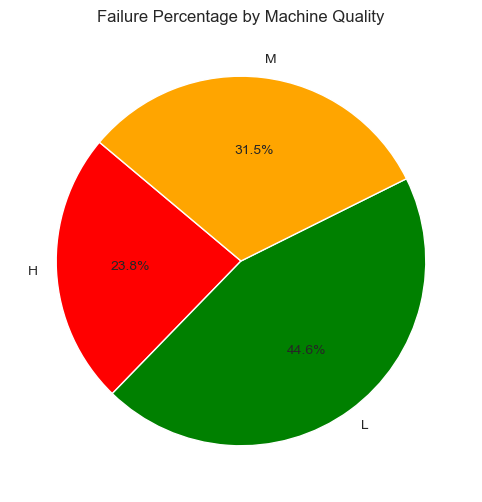

In [265]:
# Group the dataframe by 'Type' and calculate the failure counts for each type
failure_counts = df.groupby('Type')['Machine failure'].sum().reset_index()
failure_counts.columns = ['Machine Quality', 'Failure Count']

# Calculate the total counts for each machine quality
value_counts = df['Type'].value_counts().reset_index()
value_counts.columns = ['Machine Quality', 'Total Count']

# Merge the two dataframes to get a complete picture of failures vs total counts
failure_counts = failure_counts.merge(value_counts, on='Machine Quality')
failure_counts['Failure Percentage'] = (failure_counts['Failure Count'] / failure_counts['Total Count']) * 100

# Define colors for the pie chart
colors = {'L': 'green', 'M': 'orange', 'H': 'red'}

# Plotting the pie chart using the failure percentages for each machine quality
plt.figure(figsize=(10, 6))
plt.pie(failure_counts['Failure Percentage'], labels=failure_counts['Machine Quality'], 
        autopct='%1.1f%%', startangle=140, colors=[colors[label] for label in failure_counts['Machine Quality']])
plt.title('Failure Percentage by Machine Quality')
plt.show()

From the chart above, we can observe that machines of 'Low Quality' are failing at a higher percentage compared to 'High Quality' ones. This could indicate a need for more frequent maintenance schedules or quality checks for the 'Low Quality' machines to prevent downtime. Also, there is not a significant difference between the high and medium quality. From each 100 failure 44.6 comes from low quality, 31.5 comes from medium quality and 23.8 comes from high quality

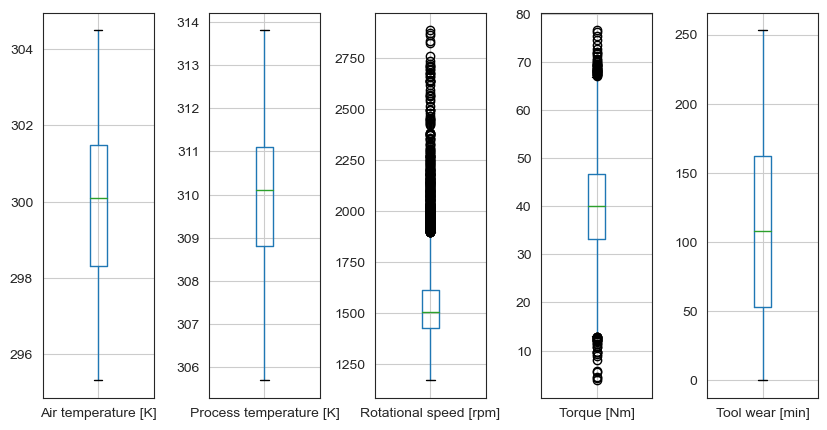

In [267]:
# 6 subplots in one row
fig, ax = plt.subplots(1, 5, figsize=(10, 5))

# draw boxplots - for one column in each subplot
df.boxplot('Air temperature [K]', ax=ax[0])
df.boxplot('Process temperature [K]', ax=ax[1])
df.boxplot('Rotational speed [rpm]', ax=ax[2])
df.boxplot('Torque [Nm]', ax=ax[3])
df.boxplot('Tool wear [min]', ax=ax[4])

plt.subplots_adjust(wspace=0.5) 

plt.show()

C:\Users\Winquistt\AppData\Local\Temp\ipykernel_21152\2885841559.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



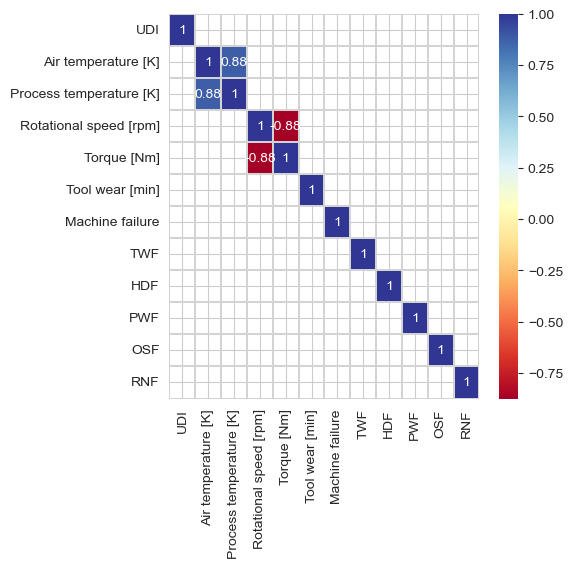

In [268]:
plt.figure(figsize=(5,5))
threshold = 0.80
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster2 = df.corr()
mask = df_cluster2.where((abs(df_cluster2) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster2,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

In [269]:
df.drop(['UDI','Product ID'],axis=1,inplace=True)

In [270]:
df.drop(['TWF','HDF','PWF','OSF','RNF'],axis=1,inplace=True)

In [271]:
df.drop(['Type'],axis=1,inplace=True)

In [272]:
list(df)

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure']

In [273]:
df = pd.get_dummies(df,drop_first=True)

In [274]:
features = list(df.columns)

In [275]:
for feature in features:
    print(feature + " - " + str(len(df[df[feature].isna()])))

Air temperature [K] - 0
Process temperature [K] - 0
Rotational speed [rpm] - 0
Torque [Nm] - 0
Tool wear [min] - 0
Machine failure - 0


In [276]:
df_group = df.groupby(['Machine failure'])
df_group.count()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Machine failure,,,,,
0,9661,9661,9661,9661,9661
1,339,339,339,339,339


In [277]:
# show the numeric characters
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


In [278]:
df_numeric.fillna(df_numeric.mean(),inplace=True)

for feature in features:
    try:
        df[feature].fillna(df[feature].mean(),inplace=True)
    except:
        try:
            df[feature].fillna(df[feature].mode(),inplace=True)
        except:
            pass

In [279]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0


Perform a statistical univariate test to determine the best features. Product type L dominates this strongly.

In [322]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2

best_features = SelectKBest(score_func=chi2,k='all')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
fit = best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)
df_col=pd.DataFrame(X.columns)

feature_score=pd.concat([df_col,df_scores],axis=1)
feature_score.columns=['feature','score']
feature_score.sort_values(by=['score'],ascending=True,inplace=True)

fig = go.Figure(go.Bar(
            x=feature_score['score'][0:21],
            y=feature_score['feature'][0:21],
            orientation='h'))

fig.update_layout(title="Top Features",
                  height=300,
                  showlegend=False,
                 )

fig.show()

In [323]:
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0


In [324]:


Selected_Features = []
import statsmodels.api as sm

def backward_regression(X, y, initial_list=[], threshold_out=0.5, verbose=True):
    """To select feature with Backward Stepwise Regression 

    Args:
        X -- features values
        y -- target variable
        initial_list -- features header
        threshold_out -- pvalue threshold of features to drop
        verbose -- true to produce lots of logging output

    Returns:
        list of selected features for modeling 
    """
    included = list(X.columns)
    while True:
        changed = False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f"worst_feature : {worst_feature}, {worst_pval} ")
        if not changed:
             break
    Selected_Features.append(included)
    print(f"\nSelected Features:\n{Selected_Features[0]}")


# Application of the backward regression function on our training data
backward_regression(X, y)


Selected Features:
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


In [325]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [326]:
X.head()
feature_names = list(X.columns)
np.shape(X)

(10000, 5)

In [327]:
np.shape(X)

(10000, 5)

In [328]:
len(feature_names)

5

In [329]:
# import library
from imblearn.over_sampling import SMOTE, SVMSMOTE,RandomOverSampler
oversamp = RandomOverSampler(random_state=0)
# oversamp = SMOTE(n_jobs=-1)

In [330]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify=y)
X_train,y_train = oversamp.fit_resample(X_train, y_train)

In [331]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [332]:
print(X_train.shape)
print(X_test.shape)

(15458, 5)
(2000, 5)


In [333]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score,roc_auc_score
#from sklearn.metrics import plot_confusion_matrix # will plot the confusion matrix
import time
model_performance = pd.DataFrame(columns=['Accuracy','Recall','Precision','F1-Score',])

Logistic Regression

In [334]:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X_train,y_train)

y_predictions = model.predict(X_test) # These are the predictions from the test data.


In [335]:
print(model)

LogisticRegression()


In [336]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')
# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))


Accuracy: 82.65%
Recall: 82.65%
Precision: 96.56%
F1-Score: 87.98%
ROC AUC score: 90.90%


Gradient Boosting

In [337]:

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier().fit(X_train,y_train)

y_predictions = model.predict(X_test) # These are the predictions from the test data.


In [338]:
print(model)

GradientBoostingClassifier()


In [339]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))

Accuracy: 93.20%
Recall: 93.20%
Precision: 97.38%
F1-Score: 94.71%
ROC AUC score: 97.15%


Decision Tree Classifier 

In [340]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier().fit(X_train,y_train)

y_predictions = model.predict(X_test) # These are the predictions from the test data.


In [341]:
print(model)

DecisionTreeClassifier()


In [342]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))

print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))



Accuracy: 97.55%
Recall: 97.55%
Precision: 97.43%
F1-Score: 97.49%
ROC AUC score: 78.87%


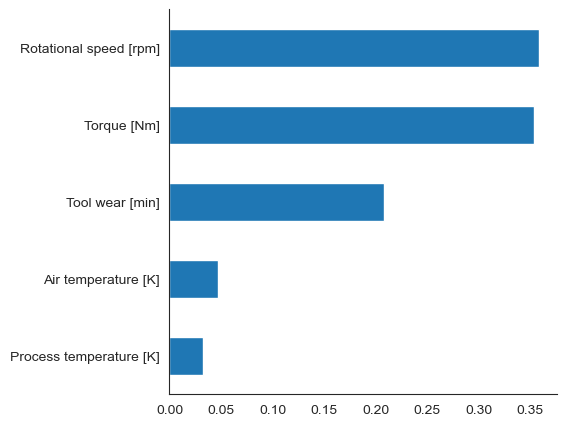

In [343]:
plt.rcParams['figure.figsize']=5,5
sns.set_style("white")
feat_importances = pd.Series(model.feature_importances_, index=feature_names)
feat_importances = feat_importances.groupby(level=0).mean()
feat_importances.nlargest(20).plot(kind='barh').invert_yaxis()
sns.despine()
plt.show()

MLP Classifier

In [344]:

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes = (100,100,), 
                      activation='relu', 
                      solver='adam',
                      batch_size=2000,
                      verbose=0).fit(X_train,y_train)

y_predictions = model.predict(X_test) # These are the predictions from the test data.


C:\Users\Winquistt\AppData\Local\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [345]:
print(model)

MLPClassifier(batch_size=2000, hidden_layer_sizes=(100, 100), verbose=0)


In [346]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

#ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))
print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))

Accuracy: 90.60%
Recall: 90.60%
Precision: 97.07%
F1-Score: 93.02%
ROC AUC score: 96.31%


Random Forest

In [347]:

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100,n_jobs=-1,random_state=0,bootstrap=True,).fit(X_train,y_train)

y_predictions = model.predict(X_test) # These are the predictions from the test data.


In [348]:
print(model)

RandomForestClassifier(n_jobs=-1, random_state=0)


In [349]:
accuracy = accuracy_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions, average='weighted')
precision = precision_score(y_test, y_predictions, average='weighted')
f1s = f1_score(y_test, y_predictions, average='weighted')

# ROC_AUC = roc_auc_score(y_test, y_predictions, average='weighted')
ROC_AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1], average='weighted')

print("Accuracy: "+ "{:.2%}".format(accuracy))
print("Recall: "+ "{:.2%}".format(recall))
print("Precision: "+ "{:.2%}".format(precision))
print("F1-Score: "+ "{:.2%}".format(f1s))

print("ROC AUC score: "+ "{:.2%}".format(ROC_AUC))

model_performance.loc['Random Forest'] = [accuracy, recall, precision, f1s]

Accuracy: 98.10%
Recall: 98.10%
Precision: 97.99%
F1-Score: 98.03%
ROC AUC score: 96.07%


Plotting graghs after you train the data

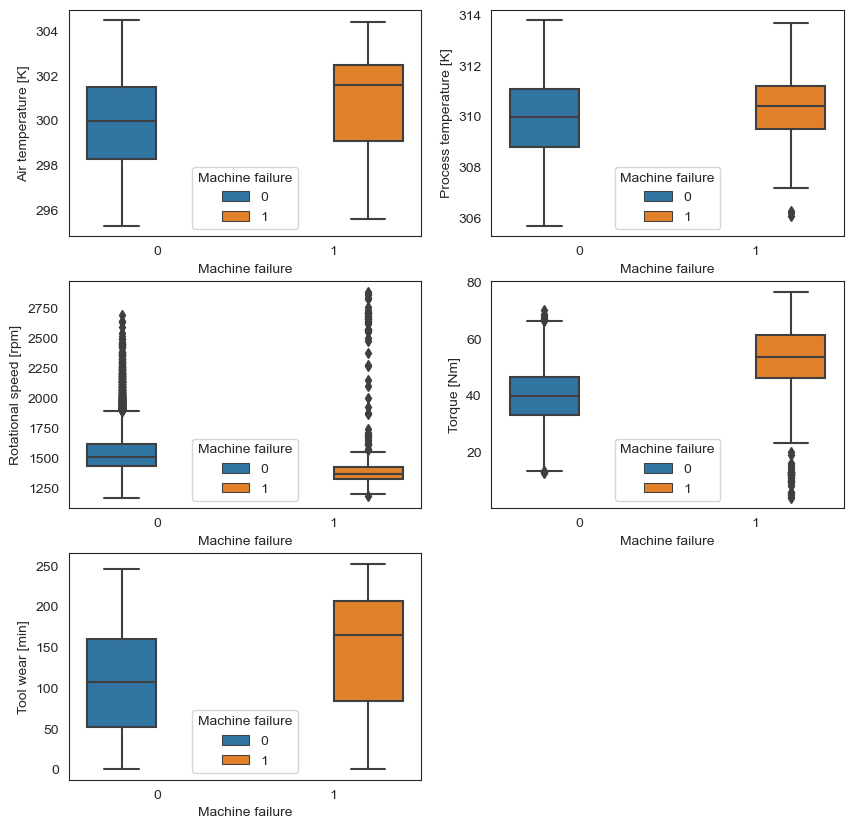

In [350]:
plt.figure(figsize = (10,10))
m=1
for i in ['Air temperature [K]', 
          'Process temperature [K]',
          'Rotational speed [rpm]', 
          'Torque [Nm]', 
          'Tool wear [min]']:
    plt.subplot(3,2,m)
    sns.boxplot(data=df,y=i,x="Machine failure",hue="Machine failure")
    m+=1

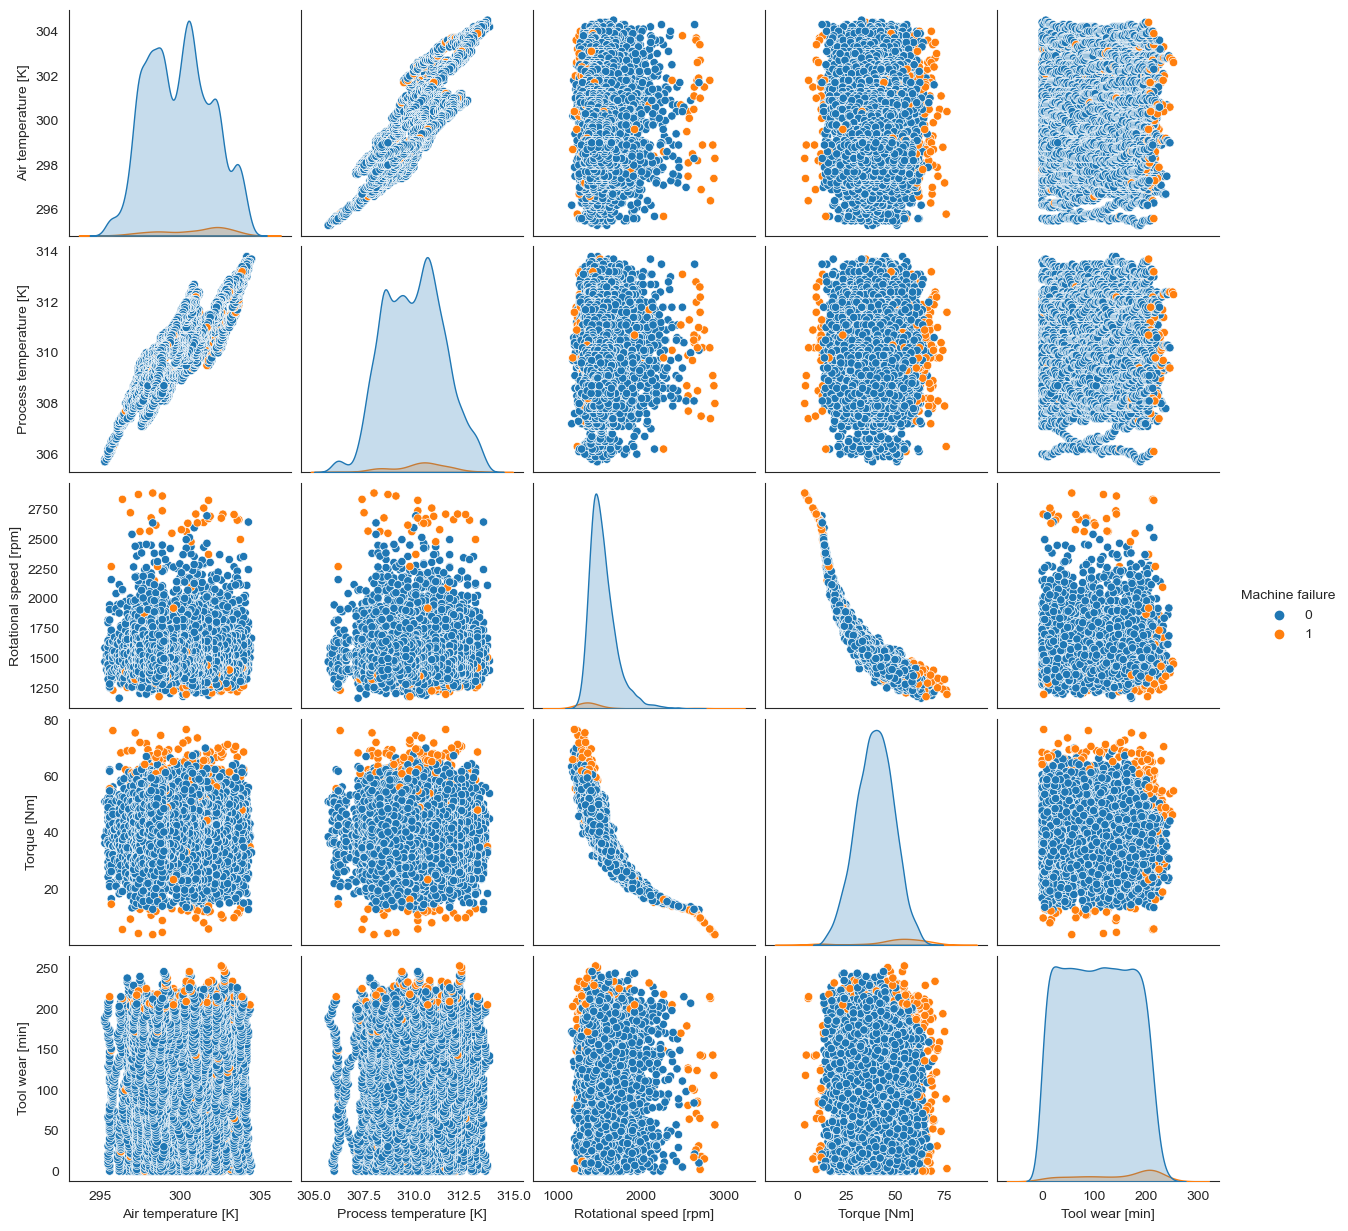

In [351]:
sns.pairplot(df, hue = 'Machine failure')
 